## Calculating the correlation coefficients for different windows of data
In this script the maximum Pearson's correlation coefficient for the time delay of GW150914 is calculated for different windows of data in the Pearson correlation coefficient method.

This script is a part of the bachelor thesis done by **Felicia A. Fredriksson from Uppsala university.** The thesis will be published shortly onto Diva with the title: **_Investigating residuals from gravitational wave events, GW151012 and GW151226_.** <br>
The work is based upon the paper mentioned below.

Before running this notebook CreateResiduals.py from the original paper, **Alex B. Nielsen, Alexander H. Nitz, Collin Capano, and Duncan A. Brown**, has to be run to download the data and get the residuals. Link to notebook: [CreateResiduals](https://github.com/gwastro/gw150914_investigation/blob/master/CreateResiduals.ipynb)

# Correlations in Residual Data

**Alex B. Nielsen<sup>1,2</sup>, Alexander H. Nitz<sup>1,2</sup>, Collin Capano<sup>1,2</sup>, and Duncan A. Brown<sup>3</sup>**

 <sub>1. [Albert-Einstein-Institut, Max-Planck-Institut for Gravitationsphysik, D-30167 Hannover, Germany](http://www.aei.mpg.de/obs-rel-cos)</sub>  
 <sub>2. Leibniz Universitat Hannover, D-30167 Hannover, Germany</sub>  
 <sub>3. Department of Physics, Syracuse University, Syracuse, NY 13244, USA</sub>  

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

We encourage use of these data in derivative works. If you use the material provided here, please cite [our paper.](https://arxiv.org/abs/1811.04071)

## Set up

Before running this notebook, you should run the [CreateResiduals](https://github.com/gwastro/gw150914_investigation/blob/master/CreateResiduals.ipynb) notebook to download the strain data and compute the maximum likelihood waveform.

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy
import pylab, numpy
import res
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The plots are written to the directory specified here. You can change the value of `output_dir` to the path where you want the plots to be written.

In [2]:
output_dir = '../paper'
!mkdir -p {output_dir}

Read in the strain data.

In [3]:
strain = res.get_raw_strain()

## Compute correlation statistic for the different residuals

The data is bandpassed using the method explained in the LOSC notebooks. This bandpassing uses the GWOSC-provided method and is implemented in the function [`bandpass()`](https://github.com/gwastro/gw150914_investigation/blob/master/res.py#L172) provided in the module [res.py](https://github.com/gwastro/gw150914_investigation/blob/master/res.py) with these supplemental materials.

The actual correlation is computed by the function [`cross_correlation()`](https://github.com/gwastro/gw150914_investigation/blob/master/res.py#L198) in the module [res.py](https://github.com/gwastro/gw150914_investigation/blob/master/res.py). This is the cross correlation function used by Creswell et al. We copied this code directly from [the notebook provided by Creswell et al.](http://www.nbi.ku.dk/gravitational-waves/correlations.html) that is linked from the ["Comments on our paper, On the time lags of the LIGO signals."](http://www.nbi.ku.dk/gravitational-waves/gravitational-waves.html) The only changes we make here are to accomodate our Python data types. In the notebook provided by Creswell et al., the strain and times come from 2D numpy arrays that were loaded from text files. Here, ``h1`` and ``l1`` are `pycbc.TimeSeries` types.

### Correlation of the data containing the GW150914 signal

In [4]:
ts = res.bandpass(strain)
ws = numpy.arange(0.03, 0.8, 0.01)
wcorr = []
for w in ws:
    tau, corr = res.cross_correlation(ts['H1'], ts['L1'], res.corr_time, w)
    wcorr.append(res.corr_near_ml(corr))

### Correlation of the residuals with the LIGO-provided NR waveform subtracted

We subtract the numerical relativity data shown in Figure 1 of the [LIGO PRL](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102) and provided on the GWOSC [GW150914 page](https://www.gw-openscience.org/events/GW150914/) in the files [fig1-waveform-H.txt](https://www.gw-openscience.org/GW150914data/P150914/fig1-waveform-H.txt) and [fig1-waveform-L.txt](https://www.gw-openscience.org/GW150914data/P150914/fig1-waveform-L.txt). For convenience, these files are provided with these supplemental materials.

In [5]:
ts2 = res.bandpass(strain)
ts2 = res.get_nrsub_strain(ts2)
wcorr_null = []
for w in ws:
    tau, corr_null = res.cross_correlation(ts2['H1'], ts2['L1'], res.corr_time, w)
    wcorr_null.append(res.corr_near_ml(corr_null))

### Correlation of the residuals with the maxiumum likelihood waveform subtracted

We subtract the maximum likelihood waveform computed based on the parameters measured by [Biwer et al.](https://arxiv.org/abs/1807.10312)

In [6]:
ts3 = res.get_residual_strain()
ts3 = res.bandpass(ts3)
wcorr_null2 = []
for w in ws:
    tau, corr_null2 = res.cross_correlation(ts3['H1'], ts3['L1'], res.corr_time, w)
    wcorr_null2.append(res.corr_near_ml(corr_null2))

### Correlation for different windows

The maximum correlation coefficients within the time delay of GW150914 ploted for different windows of data. A dotted line for the window of data used in the calculations for GW150914, w = 0.04.

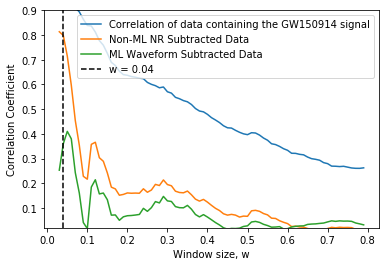

In [11]:
pylab.figure()
pylab.plot(ws, wcorr, label='Correlation of data containing the GW150914 signal')
pylab.plot(ws, wcorr_null, label='Non-ML NR Subtracted Data')
pylab.plot(ws, wcorr_null2, label='ML Waveform Subtracted Data')
y = 0.04
plt.axvline(y, color='k', linestyle='--', label = 'w = 0.04')
pylab.xlabel('Window size, w')

pylab.legend()
pylab.ylim(0.02, 0.9)
pylab.ylabel('Correlation Coefficient')
pylab.savefig(os.path.join(output_dir, 'figFelicia.pdf'), dpi=200)